# Machine Learning Project - Breast Cancer

That is our first Machine Learning project applying the knowledge acquired in the Data Science course offered by ADA and taught by professors Thiago Kuma and Arthur Chaves.

### INFO:
This dataset of breast cancer patients was obtained from the November 2017 update of the SEER Program from NCI, which provides population-based cancer statistics. The dataset involved female patients with infiltrating ductal and lobular carcinoma of the breast (histology codes 8522/3 from the SEER Primary City Recode) diagnosed between 2006-2010. Patients with unknown tumor size, examined regional lymph nodes, positive regional lymph nodes, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were included.

##### Dataset available at: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

##### Work team:
- Alessa Santos
- Beatriz Guisso
- Guilherme Tonini
- João Luiz de Castro
- Thais Carvalho
- Thiago Lopes

### Objectives:
In this work, we will cover the following Machine Learning implementation topics:

##### Implementados:
- Feature Selection
- Conversion of Categorical to Numeric
- Dataset Balancing
- Dataset Splitting
- Feature Scaling
- Algorithm Usage
- Pipeline
- Learning Curve
- Hyperparameter Optimization
- Hyperparameters Used
- Evaluation Metric

----

## 1. Inicializing

In addition to opening it in our notebook, we will analyze the types of data and also search for missing or null values. This is where all the data processing should come in.

In [1]:
# Import packages
import pandas as pd
import numpy as np

In [2]:
# dataset reading
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

No missing data were found, and there is no need to modify any data type within our dataset.

## 2. Feature Selection
We aimed to understand the meaning of each feature in the dataset and whether it is a significant factor in determining the diagnosis.

We noticed that the "Race" column, which indicates the individual's race, as well as the "Marital Status" column, which indicates marital status, do not seem to be relevant to our target definition. Therefore, we decided to remove them from our dataset to work with.

In [4]:
# Removing data that is not very relevant to our prediction
df = df.drop(['Race', 'Marital Status'], axis=1)
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## 3.Conversion of Categorical to Numeric
Here, we will identify the data in each categorical feature and transform it into numeric data.

### 3.1. Binary values
Let's manually modify the values that are simpler, that have binary outputs. In this way, they will assume values "0" or "1" depending on the value of that feature.

In [ ]:
print('Data "Status":', df['Status'].unique())
print('Data "Estrogen Status":', df['Estrogen Status'].unique())
print('Data "Progesterone Status":', df['Progesterone Status'].unique())

Dados "Status": ['Alive' 'Dead']
Dados "Estrogen Status": ['Positive' 'Negative']
Dados "Progesterone Status": ['Positive' 'Negative']


In [6]:
renomear_1 = {
    'Dead': 0,
    'Alive': 1
}
renomear_2 = {
    'Negative': 0,
    'Positive': 1
}

df['Status'] = df['Status'].map(renomear_1)
df['Estrogen Status'] = df['Estrogen Status'].map(renomear_2)
df['Progesterone Status'] = df['Progesterone Status'].map(renomear_2)

### 3.2. Dummies
For the other features that have more than 2 values, we will use the "get_dummies" function from the Pandas package.

In [7]:
# using 'get_dummies' function from Pandas
df = pd.get_dummies(data=df, columns=[
                                        "T Stage ",
                                        "N Stage",
                                        "6th Stage",
                                        "differentiate",
                                        "Grade",
                                        "A Stage"]
                                    , drop_first=True)


In this way, we are ready to start working. This is how our dataset looks like now:

In [8]:
df.head()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage _T2,T Stage _T3,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional
0,68,4,1,1,24,1,60,1,0,0,...,0,0,0,1,0,0,0,0,1,1
1,50,35,1,1,14,5,62,1,1,0,...,1,0,0,0,0,0,0,1,0,1
2,58,63,1,1,14,7,75,1,0,1,...,0,0,1,0,0,0,0,1,0,1
3,58,18,1,1,2,1,84,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,47,41,1,1,3,1,50,1,1,0,...,0,0,0,1,0,0,0,0,1,1


## 4. Balancing

In [9]:
# Analyzing the distribution of results
(df['Status'].value_counts(normalize=True)*100).round(2)

1    84.69
0    15.31
Name: Status, dtype: float64

As we observed, we do not have a proper balance of data for both results. This causes a failure in the algorithm's ability to identify results with the value of "0".

It would be necessary to perform a balancing task, however, due to the lack of time to address this topic in class, it will not be applied here.

## 5. Train-Test split
At this point, we will split the dataset so that we can submit it to training and testing, without our result being contaminated with unwanted information. This is one of the most important parts.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns=['Status'])
y = df['Status']

In [12]:
SEED = 42
np.random.seed(SEED)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

We have divided the dataset into training and testing sets. It's important to highlight the use of the "stratify" parameter, which distributes the proportion of "0" and "1" observations evenly among the datasets.

## 6. Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()

An important observation is that we need to perform Scaling on the project after the dataset has been split. This is because otherwise, there may be data leakage from X to our target, which would make the analysis biased.

In [14]:
# balancing:
X_train_std = scaler_train.fit_transform(X_train)
X_test_std = scaler_train.fit_transform(X_test)

## 7.Algorithm Usage
Since we're dealing with a binary output, we'll work with a CLASSIFICATION algorithm. We chose to use a DECISION TREE.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt

# building the model:
modelo = DecisionTreeClassifier()

In [16]:
# fitting data:
modelo.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [17]:
# Creating the model prediction
y_pred = modelo.predict(X_test_std)

In [18]:
# comparing results:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.48      0.44       123
           1       0.90      0.88      0.89       682

    accuracy                           0.81       805
   macro avg       0.66      0.68      0.67       805
weighted avg       0.83      0.81      0.82       805



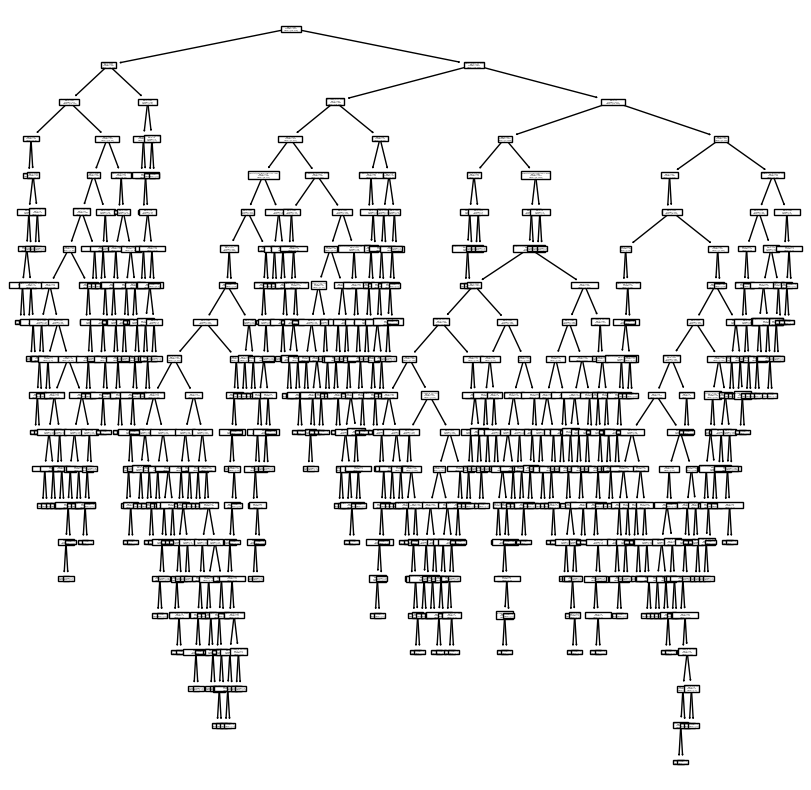

In [19]:
plt.figure(figsize=(10, 10))
tree.plot_tree(modelo, feature_names=X_train.columns)
plt.show()

We cannot determine whether the model performed well or not because we do not have any comparison parameters.

## 8. Pipeline

In [20]:
from sklearn.pipeline import Pipeline

In [ ]:
# builting pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])

## 9. Learning Curve

In [22]:
from sklearn.metrics import f1_score

In [23]:
def aprendizado_profundidade(range_profundidade, indice_ordenado_features, X_train, X_test, y_train, y_test):
    erros_train = []
    erros_test = []
    for profundidade in range_profundidade:
        modelo = DecisionTreeClassifier(random_state=42, max_depth=profundidade)

        X_train_temp = X_train
        X_test_temp = X_test

        modelo.fit(X_train_temp, y_train)

        y_pred_train = modelo.predict(X_train_temp)
        y_pred_test = modelo.predict(X_test_temp)

        erros_train.append(f1_score(y_train, y_pred_train))
        erros_test.append(f1_score(y_test, y_pred_test))
        
    return range_profundidade, erros_train, erros_test

In [24]:
# Calculation of pairwise correlation of columns
corr_mat = df.corr(method='pearson')
corr = corr_mat

# Correlation values and feature names in relation to the target, in descending order.
corr_mat['Status'].abs().sort_values(ascending=False)
indice_ordenado_features = corr_mat['Status'].abs().sort_values(ascending=False).index

# Returning values for building the graph
range_profundidade, erros_train, erros_test = aprendizado_profundidade(list(range(1, 20)), indice_ordenado_features, X_train_std, X_test_std, y_train, y_test)

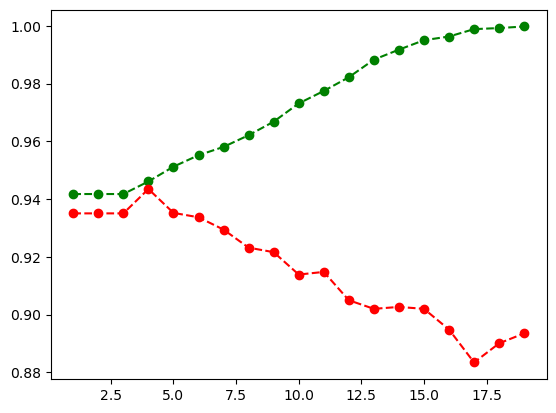

In [25]:
# Plotting the chart that shows the errors for training and testing
plt.plot(range_profundidade, erros_train, 'o--', color='g')
plt.plot(range_profundidade, erros_test, 'o--', color='r')

## 10. Hyperparameters Optimization

In [26]:
# Importando pacotes necessários
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_features': [4, 8, 12, 16, 20, 24],
    'model__max_depth': [None, 4, 8, 10, 12],
    'model__class_weight': [None, 'balanced']
}

In [28]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, n_jobs=1)

In [29]:
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 4, 8, 10, 12],
                         'model__max_features': [4, 8, 12, 16, 20, 24]})

In [30]:
y_pred = grid_search.predict(X_test_std)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.36      0.44       123
           1       0.89      0.95      0.92       682

    accuracy                           0.86       805
   macro avg       0.74      0.66      0.68       805
weighted avg       0.84      0.86      0.85       805



In [32]:
grid_search.best_params_

{'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': 4,
 'model__max_features': 8}

## 11. Hyperparameters used
Here, for reinforcement, we will recreate the model following the indication given by the Grid Search.

In [33]:
novo_modelo = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=8)

In [34]:
novo_modelo.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, max_features=8)

In [35]:
y_pred = novo_modelo.predict(X_test_std)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.49      0.58       123
           1       0.91      0.96      0.94       682

    accuracy                           0.89       805
   macro avg       0.81      0.73      0.76       805
weighted avg       0.88      0.89      0.88       805



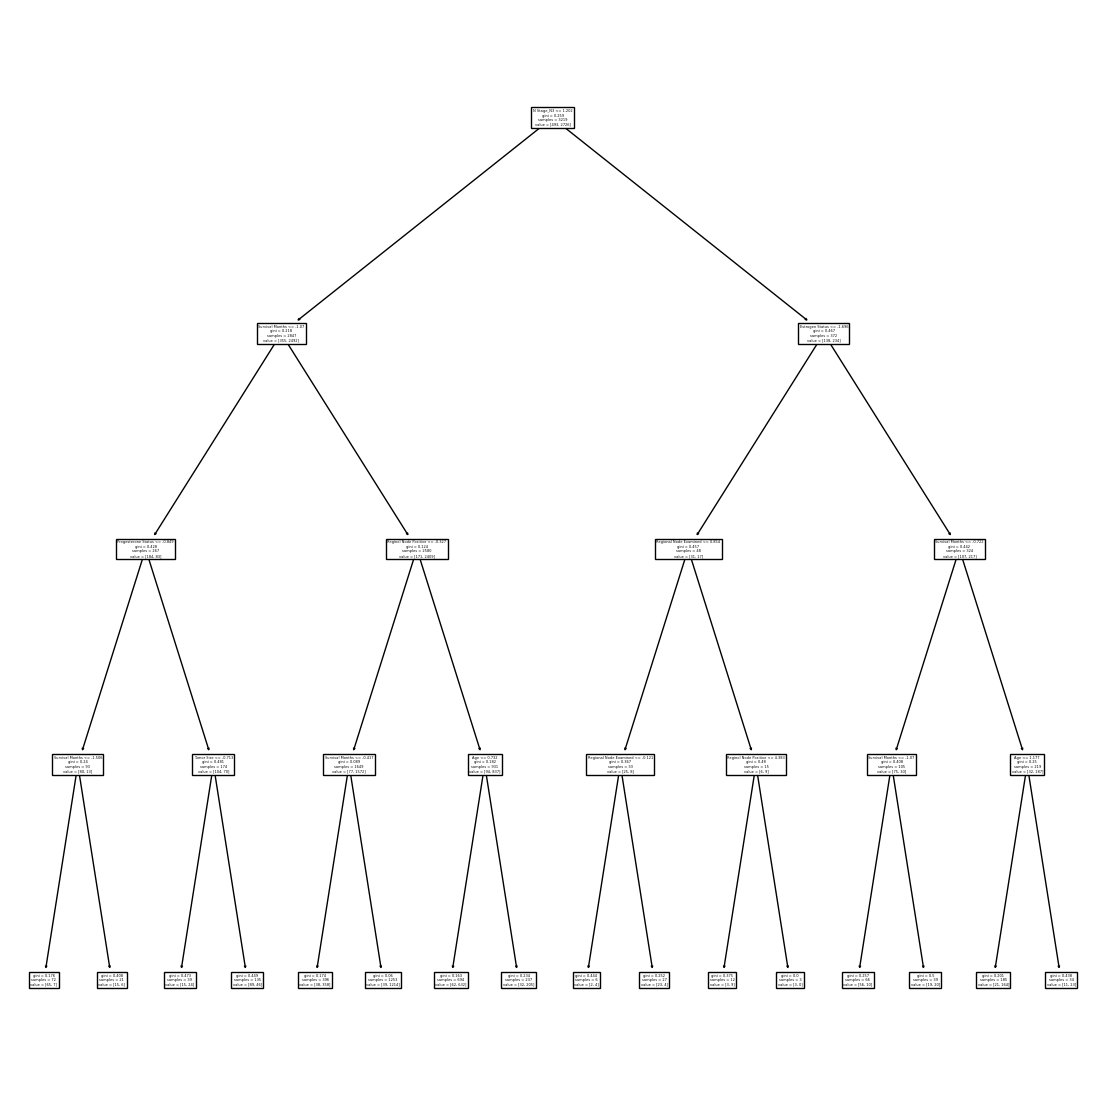

In [37]:
plt.figure(figsize=(14, 14))
tree.plot_tree(novo_modelo, feature_names=X_train.columns)
plt.show()

## 12. Evaluation Metrics
As a metric system, we will use the f1-score. Since the topic at hand is sensitive, we need our model to take into account both precision, which shows the relationship between true positives and false positives, and recall, which takes into account the relationship between true positives and false negatives. The f1-score, being a harmonic mean between these two values, represents well the aspect we want to achieve with the model.

<img src="https://miro.medium.com/v2/resize:fit:524/format:webp/0*y44_Lwph8dleLgkr.png" width=250>

## 13. Conclusion

- Our model's accuracy, which was initially 81%, increased to 90% after hyperparameter tuning.
- We still need to analyze other algorithms to see the difference in the efficiency of the obtained result.